# Matrix Operations, Statistics & NumPy Exercises

A set of 10 exercises covering determinants, inverses, statistical analysis, date manipulation, image representation, hypothesis testing, and visualization using NumPy, Pandas, and Matplotlib.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
print("Libraries loaded.")

Libraries loaded.


---
## Exercise 1: Matrix Operations

We create a 3×3 matrix and compute its **determinant** and **inverse**.

- The determinant tells us if the matrix is invertible (det ≠ 0) and geometrically represents the scaling factor of the linear transformation.
- The inverse $A^{-1}$ satisfies $A \cdot A^{-1} = I$ (identity matrix).

In [2]:
# define a 3x3 matrix
A = np.array([
    [2, 1, 3],
    [4, 5, 6],
    [7, 8, 9]
])
print("Matrix A:")
print(A)

Matrix A:
[[2 1 3]
 [4 5 6]
 [7 8 9]]


In [3]:
# 1. Determinant
det_A = np.linalg.det(A)
print(f"Determinant of A: {det_A:.4f}")

if abs(det_A) < 1e-10:
    print("Matrix is singular (no inverse exists).")
else:
    print("Matrix is invertible (det != 0).")

Determinant of A: -9.0000
Matrix is invertible (det != 0).


In [4]:
# 2. Inverse
A_inv = np.linalg.inv(A)
print("Inverse of A:")
print(np.round(A_inv, 4))

# verification: A * A_inv should give the identity matrix
identity_check = A @ A_inv
print("\nVerification (A @ A_inv):")
print(np.round(identity_check, 10))

Inverse of A:
[[ 0.3333 -1.6667  1.    ]
 [-0.6667  0.3333 -0.    ]
 [ 0.3333  1.     -0.6667]]

Verification (A @ A_inv):
[[ 1.  0.  0.]
 [-0.  1.  0.]
 [-0.  0.  1.]]


---
## Exercise 2: Statistical Analysis

Generate 50 random numbers and compute **mean**, **median**, and **standard deviation**.

In [5]:
# generate 50 random numbers from a normal distribution
data = np.random.normal(loc=100, scale=15, size=50)
print(f"First 10 values: {np.round(data[:10], 2)}")
print(f"Shape: {data.shape}")

First 10 values: [107.45  97.93 109.72 122.85  96.49  96.49 123.69 111.51  92.96 108.14]
Shape: (50,)


In [6]:
# 1. Mean and Median
mean_val = np.mean(data)
median_val = np.median(data)

print(f"Mean:   {mean_val:.4f}")
print(f"Median: {median_val:.4f}")

# 2. Standard Deviation
std_val = np.std(data, ddof=1)  # ddof=1 for sample std
print(f"Standard Deviation (sample): {std_val:.4f}")

# bonus: variance
var_val = np.var(data, ddof=1)
print(f"Variance (sample): {var_val:.4f}")

Mean:   96.6179
Median: 96.4878
Standard Deviation (sample): 14.0050
Variance (sample): 196.1409


---
## Exercise 3: Date Manipulation

Create a NumPy array of all dates in January 2023 and convert them to `YYYY/MM/DD` format.

In [7]:
# create date array for January 2023
dates_jan = np.arange("2023-01-01", "2023-02-01", dtype="datetime64[D]")
print(f"January 2023 dates ({len(dates_jan)} days):")
print(dates_jan)

January 2023 dates (31 days):
['2023-01-01' '2023-01-02' '2023-01-03' '2023-01-04' '2023-01-05'
 '2023-01-06' '2023-01-07' '2023-01-08' '2023-01-09' '2023-01-10'
 '2023-01-11' '2023-01-12' '2023-01-13' '2023-01-14' '2023-01-15'
 '2023-01-16' '2023-01-17' '2023-01-18' '2023-01-19' '2023-01-20'
 '2023-01-21' '2023-01-22' '2023-01-23' '2023-01-24' '2023-01-25'
 '2023-01-26' '2023-01-27' '2023-01-28' '2023-01-29' '2023-01-30'
 '2023-01-31']


In [8]:
# convert to YYYY/MM/DD format
# numpy datetime64 default format is YYYY-MM-DD, so we convert to string and replace
dates_formatted = np.array([str(d).replace("-", "/") for d in dates_jan])
print("Converted to YYYY/MM/DD format:")
print(dates_formatted)

Converted to YYYY/MM/DD format:
['2023/01/01' '2023/01/02' '2023/01/03' '2023/01/04' '2023/01/05'
 '2023/01/06' '2023/01/07' '2023/01/08' '2023/01/09' '2023/01/10'
 '2023/01/11' '2023/01/12' '2023/01/13' '2023/01/14' '2023/01/15'
 '2023/01/16' '2023/01/17' '2023/01/18' '2023/01/19' '2023/01/20'
 '2023/01/21' '2023/01/22' '2023/01/23' '2023/01/24' '2023/01/25'
 '2023/01/26' '2023/01/27' '2023/01/28' '2023/01/29' '2023/01/30'
 '2023/01/31']


---
## Exercise 4: Data Manipulation with NumPy and Pandas

Create a DataFrame with random numbers, then perform conditional selection and aggregation.

In [9]:
# create a DataFrame with random data
df = pd.DataFrame({
    "A": np.random.randint(1, 100, size=20),
    "B": np.random.uniform(0, 50, size=20),
    "C": np.random.choice(["X", "Y", "Z"], size=20)
})
print("DataFrame:")
print(df.head(10))

DataFrame:
    A          B  C
0  41  46.315044  Y
1  29  32.553851  Y
2  15  45.747984  X
3  45  42.501929  Z
4  65  22.472534  Z
5  89   4.770506  Z
6  71  18.540913  X
7   9  33.442063  X
8  88  33.296118  Y
9   1  29.564889  X


In [10]:
# 1. Conditional selection: rows where A > 50 AND B > 25
filtered = df[(df["A"] > 50) & (df["B"] > 25)]
print(f"Rows where A > 50 and B > 25 ({len(filtered)} rows):")
print(filtered)

Rows where A > 50 and B > 25 (3 rows):
     A          B  C
8   88  33.296118  Y
11  88  28.062171  Z
14  81  42.445691  Z


In [11]:
# 2. Aggregation functions
print("=== Aggregation by group C ===")
agg_result = df.groupby("C").agg(
    A_sum=("A", "sum"),
    A_mean=("A", "mean"),
    B_sum=("B", "sum"),
    B_mean=("B", "mean"),
    count=("A", "count")
)
print(agg_result.round(2))

print(f"\nOverall sum of A: {df['A'].sum()}")
print(f"Overall mean of B: {df['B'].mean():.2f}")

=== Aggregation by group C ===
   A_sum  A_mean   B_sum  B_mean  count
C                                      
X    202   28.86  194.33   27.76      7
Y    158   52.67  112.17   37.39      3
Z    460   46.00  252.93   25.29     10

Overall sum of A: 820
Overall mean of B: 27.97


---
## Exercise 5: Image Representation

**How images are represented as NumPy arrays:**

- A **grayscale** image is a 2D array of shape `(height, width)`, where each value represents pixel intensity (0 = black, 255 = white for 8-bit).
- A **color (RGB)** image is a 3D array of shape `(height, width, 3)`, where the 3 channels are Red, Green, Blue.
- This representation is what libraries like OpenCV, PIL, and scikit-image use internally.

Below we create a simple 5×5 grayscale image.

In [12]:
# create a 5x5 grayscale image (values 0-255)
image = np.array([
    [  0,  50, 100, 150, 200],
    [ 50, 100, 150, 200, 250],
    [100, 150, 200, 250, 200],
    [150, 200, 250, 200, 150],
    [200, 250, 200, 150, 100]
], dtype=np.uint8)

print("5x5 Grayscale image (pixel values):")
print(image)
print(f"\nShape: {image.shape}")
print(f"Dtype: {image.dtype}")
print(f"Min pixel: {image.min()}, Max pixel: {image.max()}")

5x5 Grayscale image (pixel values):
[[  0  50 100 150 200]
 [ 50 100 150 200 250]
 [100 150 200 250 200]
 [150 200 250 200 150]
 [200 250 200 150 100]]

Shape: (5, 5)
Dtype: uint8
Min pixel: 0, Max pixel: 250


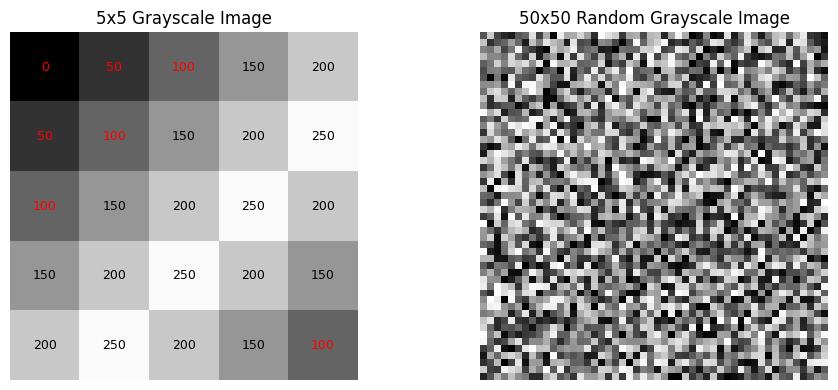

In [13]:
# visualize the image
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# grayscale display
axes[0].imshow(image, cmap="gray", vmin=0, vmax=255)
axes[0].set_title("5x5 Grayscale Image")
axes[0].axis("off")
for i in range(5):
    for j in range(5):
        axes[0].text(j, i, str(image[i, j]), ha="center", va="center",
                     color="red" if image[i, j] < 128 else "black", fontsize=9)

# larger random image for fun
big_image = np.random.randint(0, 256, size=(50, 50), dtype=np.uint8)
axes[1].imshow(big_image, cmap="gray")
axes[1].set_title("50x50 Random Grayscale Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()

---
## Exercise 6: Basic Hypothesis Testing

We test whether a training program significantly improved employee productivity using a **paired t-test**.

**Hypotheses:**
- $H_0$: The training program has no effect (mean difference = 0)
- $H_1$: The training program improved productivity (mean difference > 0)

We use a one-sided test since we specifically expect improvement.

In [14]:
# generate the data
np.random.seed(42)
productivity_before = np.random.normal(loc=50, scale=10, size=30)
productivity_after = productivity_before + np.random.normal(loc=5, scale=3, size=30)

print(f"Before — mean: {np.mean(productivity_before):.2f}, std: {np.std(productivity_before, ddof=1):.2f}")
print(f"After  — mean: {np.mean(productivity_after):.2f}, std: {np.std(productivity_after, ddof=1):.2f}")

Before — mean: 48.12, std: 9.00
After  — mean: 52.76, std: 9.68


In [15]:
# compute the differences
differences = productivity_after - productivity_before
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)
n = len(differences)

print(f"Mean difference: {mean_diff:.4f}")
print(f"Std of differences: {std_diff:.4f}")
print(f"Sample size: {n}")

# t-statistic (paired test): t = mean_diff / (std_diff / sqrt(n))
t_stat = mean_diff / (std_diff / np.sqrt(n))
print(f"\nt-statistic: {t_stat:.4f}")

# degrees of freedom
dof = n - 1

# for a one-sided test at alpha = 0.05, critical t-value with 29 dof is ~1.699
# we can compute the p-value using scipy, but since the exercise says "basic numpy",
# we compare against a known critical value
t_critical = 1.699  # one-sided, alpha=0.05, dof=29

print(f"Critical t-value (one-sided, alpha=0.05): {t_critical}")
print(f"\nResult: t_stat ({t_stat:.2f}) {'>' if t_stat > t_critical else '<='} t_critical ({t_critical})")

if t_stat > t_critical:
    print("=> REJECT H0: The training program significantly improved productivity.")
else:
    print("=> FAIL TO REJECT H0: No significant improvement detected.")

Mean difference: 4.6365
Std of differences: 2.7933
Sample size: 30

t-statistic: 9.0915
Critical t-value (one-sided, alpha=0.05): 1.699

Result: t_stat (9.09) > t_critical (1.699)
=> REJECT H0: The training program significantly improved productivity.


In [16]:
# bonus: verify with scipy (not required but good practice)
from scipy import stats

t_scipy, p_scipy = stats.ttest_rel(productivity_after, productivity_before, alternative="greater")
print(f"SciPy verification — t={t_scipy:.4f}, p={p_scipy:.6f}")
print(f"Significant at alpha=0.05? {'Yes' if p_scipy < 0.05 else 'No'}")

SciPy verification — t=9.0915, p=0.000000
Significant at alpha=0.05? Yes


---
## Exercise 7: Complex Array Comparison

Create two arrays and perform element-wise comparison to find which elements in the first array are greater.

In [17]:
arr1 = np.array([12, 5, 23, 7, 45, 18, 3, 30])
arr2 = np.array([10, 8, 20, 7, 50, 15, 9, 25])

print(f"Array 1: {arr1}")
print(f"Array 2: {arr2}")

# element-wise comparison
comparison = arr1 > arr2
print(f"\narr1 > arr2: {comparison}")

# show the actual values where arr1 is greater
print(f"\nElements in arr1 that are greater: {arr1[comparison]}")
print(f"Corresponding elements in arr2:    {arr2[comparison]}")

# difference
diff = arr1 - arr2
print(f"\nElement-wise difference (arr1 - arr2): {diff}")

Array 1: [12  5 23  7 45 18  3 30]
Array 2: [10  8 20  7 50 15  9 25]

arr1 > arr2: [ True False  True False False  True False  True]

Elements in arr1 that are greater: [12 23 18 30]
Corresponding elements in arr2:    [10 20 15 25]

Element-wise difference (arr1 - arr2): [ 2 -3  3  0 -5  3 -6  5]


---
## Exercise 8: Time Series Data Manipulation

Generate daily time series data for 2023 and slice it by quarter.

In [18]:
# generate daily dates for all of 2023
dates_2023 = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")

# create a time series with random data (e.g., daily temperature)
ts_data = pd.Series(
    np.random.normal(loc=20, scale=10, size=len(dates_2023)),
    index=dates_2023,
    name="temperature"
)
print(f"Time series: {len(ts_data)} days")
print(ts_data.head())

Time series: 365 days
2023-01-01    15.208258
2023-01-02    18.143410
2023-01-03     8.936650
2023-01-04     8.037934
2023-01-05    28.125258
Freq: D, Name: temperature, dtype: float64


In [19]:
# slice by quarters
q1 = ts_data["2023-01":"2023-03"]  # January to March
q2 = ts_data["2023-04":"2023-06"]  # April to June
q3 = ts_data["2023-07":"2023-09"]  # July to September
q4 = ts_data["2023-10":"2023-12"]  # October to December

quarters = {"Q1 (Jan-Mar)": q1, "Q2 (Apr-Jun)": q2, "Q3 (Jul-Sep)": q3, "Q4 (Oct-Dec)": q4}

for name, q in quarters.items():
    print(f"{name}: {len(q)} days, mean = {q.mean():.2f}, std = {q.std():.2f}")

Q1 (Jan-Mar): 90 days, mean = 19.66, std = 9.66
Q2 (Apr-Jun): 91 days, mean = 21.21, std = 10.07
Q3 (Jul-Sep): 92 days, mean = 20.80, std = 9.60
Q4 (Oct-Dec): 92 days, mean = 20.82, std = 9.44


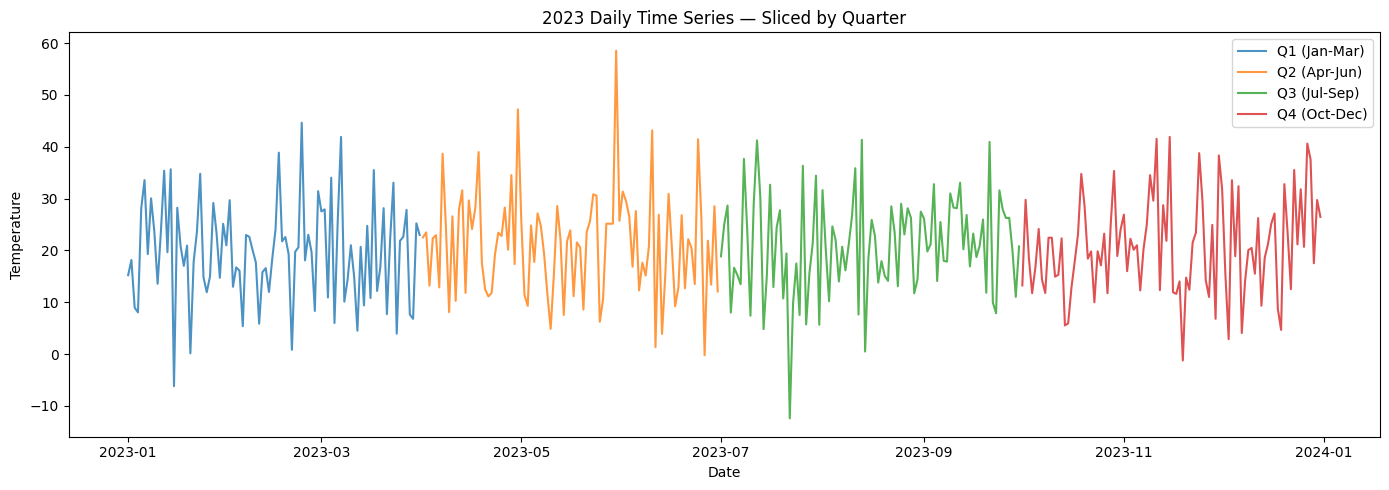

In [20]:
# visualize quarters
fig, ax = plt.subplots(figsize=(14, 5))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
for (name, q), color in zip(quarters.items(), colors):
    ax.plot(q.index, q.values, label=name, color=color, alpha=0.8)

ax.set_xlabel("Date")
ax.set_ylabel("Temperature")
ax.set_title("2023 Daily Time Series — Sliced by Quarter")
ax.legend()
plt.tight_layout()
plt.show()

---
## Exercise 9: Data Conversion

Demonstrate conversion between NumPy arrays and Pandas DataFrames.

In [21]:
# NumPy array -> Pandas DataFrame
arr = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
print("Original NumPy array:")
print(arr)
print(f"Type: {type(arr)}")

df_from_np = pd.DataFrame(arr, columns=["col_A", "col_B", "col_C"])
print("\nConverted to DataFrame:")
print(df_from_np)
print(f"Type: {type(df_from_np)}")

Original NumPy array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Type: <class 'numpy.ndarray'>

Converted to DataFrame:
   col_A  col_B  col_C
0      1      2      3
1      4      5      6
2      7      8      9
Type: <class 'pandas.DataFrame'>


In [22]:
# Pandas DataFrame -> NumPy array
arr_back = df_from_np.to_numpy()
print("Converted back to NumPy array:")
print(arr_back)
print(f"Type: {type(arr_back)}")

# verify they're equal
print(f"\nArrays are equal: {np.array_equal(arr, arr_back)}")

Converted back to NumPy array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Type: <class 'numpy.ndarray'>

Arrays are equal: True


---
## Exercise 10: Basic Visualization

Visualize a simple dataset using Matplotlib and NumPy.

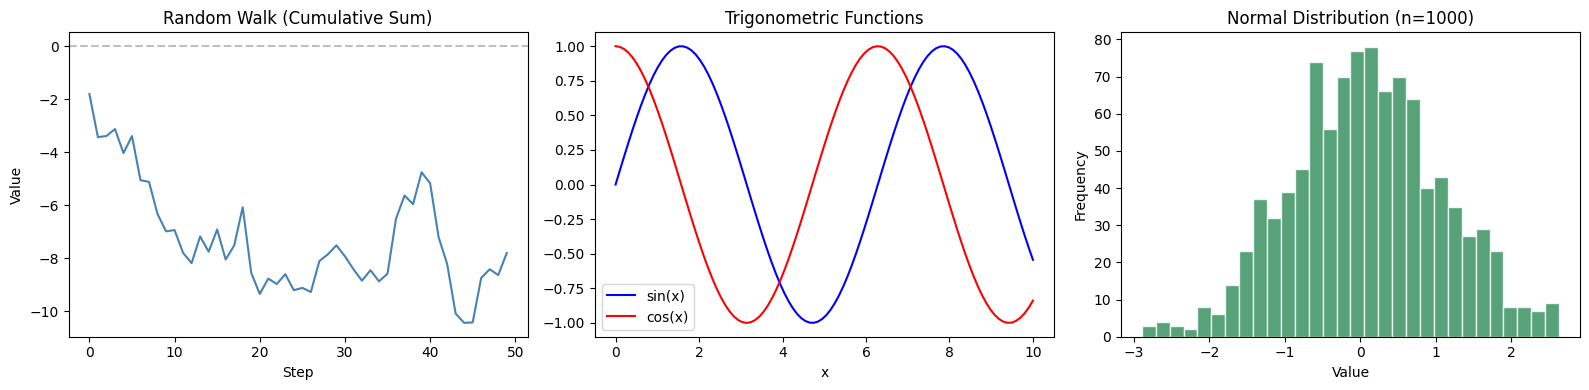

In [23]:
# generate data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y_random = np.cumsum(np.random.randn(100)) / 10  # random walk

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# 1. Line graph of random numbers
random_data = np.random.randn(50).cumsum()
axes[0].plot(random_data, color="steelblue", linewidth=1.5)
axes[0].set_title("Random Walk (Cumulative Sum)")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Value")
axes[0].axhline(y=0, color="gray", linestyle="--", alpha=0.5)

# 2. Sin and Cos
axes[1].plot(x, y1, label="sin(x)", color="blue")
axes[1].plot(x, y2, label="cos(x)", color="red")
axes[1].set_title("Trigonometric Functions")
axes[1].set_xlabel("x")
axes[1].legend()

# 3. Histogram of random data
samples = np.random.normal(0, 1, 1000)
axes[2].hist(samples, bins=30, color="seagreen", edgecolor="white", alpha=0.8)
axes[2].set_title("Normal Distribution (n=1000)")
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

---
*End of exercises.*